In [62]:
import numpy as np
import netCDF4 as nc

import iris
import iris.plot as iplt
import iris.quickplot as qplt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,16)
%matplotlib inline



In [24]:
import data_info
from iris_jules import jules

In [18]:
IMOGEN_SOURCES_INFO=data_info.IMOGEN_OUTPUT_SOURCES()

In [19]:
SOURCES=['STD_2.6_config','Tprof_2.6_config']

In [97]:
DiagVars=['gpp_gb','co2_mmr','t1p5m_gb']#,'t_soil','cs_gb','fwetl','fch4_wetl_cs',

In [102]:
# Read in data
DATA_DICT={}
for source in SOURCES:
    DATA_DICT[source]={}
    source_info=IMOGEN_SOURCES_INFO[source]
    for year in range(source_info['START_YEAR'],source_info['END_YEAR']+1):
        #print(year)
        infile=source_info['dir']+'/'+source_info['file_tag'].replace('YYYY',str(year))
        inf=nc.Dataset(infile,'r')
        
        for var in DiagVars:
            if year==source_info['START_YEAR']:
                DATA_DICT[source][var]=inf.variables[var][:].squeeze()
            else:
                DATA_DICT[source][var]=np.append(DATA_DICT[source][var],\
                                                 inf.variables[var][:].squeeze(), \
                                                 axis=0
                                                )
        inf.close()

                    
        
        
        

ValueError: all the input arrays must have same number of dimensions

In [99]:
DATA_DICT

{'STD_2.6_config': {'co2_mmr': array([[[ 0.00046826,  0.00046826,  0.00046826, ...,  0.00046826,
            0.00046826,  0.00046826]],
  
         [[ 0.00055413,  0.00055413,  0.00055413, ...,  0.00055413,
            0.00055413,  0.00055413]],
  
         [[ 0.0005539 ,  0.0005539 ,  0.0005539 , ...,  0.0005539 ,
            0.0005539 ,  0.0005539 ]],
  
         ..., 
         [[ 0.00059699,  0.00059699,  0.00059699, ...,  0.00059699,
            0.00059699,  0.00059699]],
  
         [[ 0.00060112,  0.00060112,  0.00060112, ...,  0.00060112,
            0.00060112,  0.00060112]],
  
         [[ 0.00060528,  0.00060528,  0.00060528, ...,  0.00060528,
            0.00060528,  0.00060528]]], dtype=float32),
  'gpp_gb': array([[[  3.21454721e-08,   3.37850565e-08,   5.25259214e-09, ...,
             0.00000000e+00,   0.00000000e+00,   1.01542930e-17]],
  
         [[  3.34893180e-08,   3.54655540e-08,   5.56330182e-09, ...,
             0.00000000e+00,   0.00000000e+00,   6.59221755e-1

In [86]:
print(infile)
#help(jules.load)
FILE_TEMPLATE=source_info['dir']+'/'+source_info['file_tag'].replace('YYYY','????')
print(FILE_TEMPLATE)
GPP_cube=jules.load(FILE_TEMPLATE,cubename='Gridbox gross primary productivity')

/users/eow/edwcom/CLIFFTOP/IMOGEN/outputs/Tprof_2.6_config/vn4.7_imogen_CEN_MOHC_MOD_HadGEM2-ES_rcp2p6.Annual.2008.nc
/users/eow/edwcom/CLIFFTOP/IMOGEN/outputs/Tprof_2.6_config/vn4.7_imogen_CEN_MOHC_MOD_HadGEM2-ES_rcp2p6.Annual.????.nc


/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/iris/fileformats/cf.py:1139: UserWarning: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warnings.warn(msg)
/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1301: UserWarning: Ignoring netCDF variable 'soil_CN_gb' invalid units ':'
  warnings.warn(msg)
/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1301: UserWarning: Ignoring netCDF variable 'soil_CN' invalid units ':'
  warnings.warn(msg)
/users/eow/edwcom/code/PYTHON/iris_jules/jules.py:807: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an er

In [88]:
NEW_cube=GPP_cube.concatenate()

In [90]:
NEW_cube

[<iris 'Cube' of Gridbox gross primary productivity / (kg m-2 s-1) (time: 2; latitude: 56; longitude: 96)>,
<iris 'Cube' of Gridbox gross primary productivity / (kg m-2 s-1) (time: 19; latitude: 56; longitude: 96)>,
<iris 'Cube' of Gridbox gross primary productivity / (kg m-2 s-1) (time: 39; latitude: 56; longitude: 96)>,
<iris 'Cube' of Gridbox gross primary productivity / (kg m-2 s-1) (time: 39; latitude: 56; longitude: 96)>,
<iris 'Cube' of Gridbox gross primary productivity / (kg m-2 s-1) (time: 49; latitude: 56; longitude: 96)>,
<iris 'Cube' of Gridbox gross primary productivity / (kg m-2 s-1) (time: 1; latitude: 56; longitude: 96)>]

In [91]:
NEW_cube.concatenate_cube()

ConcatenateError: failed to concatenate into a single cube.
  Dimension coordinates metadata differ: time != time

In [78]:
GPP_cube

<iris 'Cube' of Gridbox gross primary productivity / (kg m-2 s-1) (time: 1; latitude: 56; longitude: 96)>

In [73]:
GPP_TS=GPP_cube.collapsed(['latitude','longitude'],iris.analysis.MEAN)

/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/iris/cube.py:2975: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/iris/coords.py:987: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/iris/coords.py:987: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))
/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/numpy/ma/core.py:812: RuntimeWarning: invalid value encountered in absolute
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


In [77]:
GPP_TS.data

masked_array(data = [--],
             mask = [ True],
       fill_value = 1e+20)

In [75]:
iplt.plot(GPP_TS)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fcd3cbc61e0> (for post_execute):


ValueError: ordinal must be >= 1

ValueError: ordinal must be >= 1

In [38]:
frac_file='/users/eow/edwcom/CLIFFTOP/IMOGEN/ancils/frac.nc'
dump_file='/users/eow/edwcom/CLIFFTOP/IMOGEN/ancils/vn4.7_imogen.spinup_409.dump.18600101.0.noNAN.nc'
dump_cube=jules.load_dump(dump_file)

/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/iris/fileformats/cf.py:1139: UserWarning: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warnings.warn(msg)
/users/eow/edwcom/code/PYTHON/iris_jules/jules.py:807: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  griddata[..., latind_int[gridpt], lonind_int[gridpt]] = data[..., gridpt]


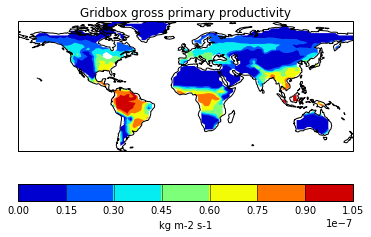

In [63]:
GPPtot = GPP_cube[0].collapsed('time',iris.analysis.SUM)
qplt.contourf(GPPtot)
plt.gca().coastlines()
plt.show()